In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [27]:
def width2var(w):
    var = (w/2)**2
    return var

In [28]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (60))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 450, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (40))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [29]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(data.shape)
print(data)
print(locs)
print(rents)

(130, 3)
[[ 40.69516577 510.42297023  28.29573272]
 [100.19632112 419.62848808  24.83208183]
 [ 88.22387936 415.66224508  22.62983274]
 [ 97.75143425 618.13535159  25.50134598]
 [146.87547639 608.17226334  26.51688148]
 [115.89023861 430.36058188  25.38334356]
 [165.30801017 622.99133432  23.51695654]
 [ 44.62293455 649.64621699  23.07862415]
 [ 22.65373668 598.8163928   24.25860287]
 [101.73582806 424.71744464  24.5316633 ]
 [104.25409534 580.50394599  24.09223543]
 [113.29754645 631.33850469  22.00562606]
 [152.26390008 410.98451201  21.01435119]
 [ 87.88279953 584.31430932  23.30217826]
 [ 47.26719367 459.63764358  23.88178344]
 [ 99.46618518 386.1765196   31.29449946]
 [109.91381274 533.46399699  25.9093751 ]
 [125.62140365 252.65496332  24.20676764]
 [121.4899698  319.82813688  24.36681132]
 [199.20827844 393.47998585  30.41296353]
 [ 85.78013866 680.21045859  24.20881253]
 [135.51503073 436.74643999  22.35180114]
 [123.41812168 531.23270086  26.54450481]
 [164.61633077 492.611177

(874, 620, 3)


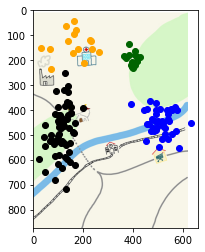

In [30]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

[Text(0.5, 0.8333333333333334, 'X[0] <= 434.981\nsquared_error = 52.949\nsamples = 130\nvalue = 26.428'),
 Text(0.25, 0.5, 'X[1] <= 244.144\nsquared_error = 20.249\nsamples = 91\nvalue = 22.434'),
 Text(0.125, 0.16666666666666666, 'squared_error = 17.574\nsamples = 30\nvalue = 17.967'),
 Text(0.375, 0.16666666666666666, 'squared_error = 6.927\nsamples = 61\nvalue = 24.631'),
 Text(0.75, 0.5, 'X[0] <= 487.011\nsquared_error = 5.167\nsamples = 39\nvalue = 35.748'),
 Text(0.625, 0.16666666666666666, 'squared_error = 5.216\nsamples = 10\nvalue = 34.422'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.334\nsamples = 29\nvalue = 36.206')]

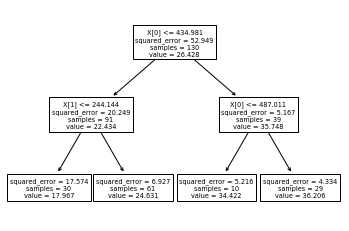

In [32]:
tree.plot_tree(model)

In [33]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data.tolist()))
print(img.shape)
mietdaten = np.copy(data)
mietdaten[:,0] = data[:,0]/img.shape[1]*100
mietdaten[:,1] = data[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(874, 620, 3)


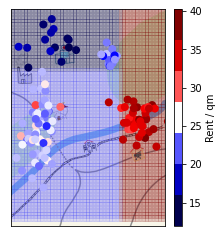

In [34]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None